# О случайном числе

На этот пост меня вдохновил стрип от Abstruse Goose [1]. 

Сегодня я хочу поговорить о случайном числе: длинном, но конечном случайном числе, которое состоит чисто из нулей и единиц. Определение случайности, которое мне нравится больше всего, я нашел в книге Теренса Тао "Структура и случайность" [2]. Оно звучит примерно так: истинно случайным называется число, описание которого нельзя получить короче, чем записав все цифры, из которых оно состоит. Согласно этому определению, любое число, сгенерированное при помощи компьютера, не является случайным, потому что его описание можно получить как  ГенераторСлучайныхЧисел(СтартовоеЗначение). Но для большей части целей (даже для криптографии) псевдослучайные числа вполне годятся.

Давайте получим криптографически стойкое псевдослучайное число с помощью Python:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import argmax, array, pi, cos, linspace
from randomnumber import Helper
from IPython.display import Image
h = Helper()
h.number

'10000100011000110101101000101100101100011011101110000000001001110010100011101010000000011111001101100100110011011011011101110101011110000011000001110011000110100010000010110111101101010000000000011111110001110010010110111110100100000001111100101011111011010010000000101100001101110000111000110100111101111001011110011101010011110101000101000101001101100001010001001110100110001001100010111010110000100111110001100001001111010000001000011011111010000101010010000101001010100000101000101001111111011000110110110001110101111110011110001101100010111110111101011010010110100001110100000100111110000001101011011101100010100001000100111111001001010010101101001011011000000010001110101111001000010001001001100001101000011100101110010001111010001010011001101100110110110000000000000000000'

Заодно, слегка отойдя от темы, инициализируем простенькую рекуррентную нейросетку, она пригодится нам позже:

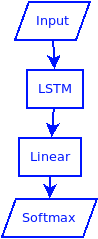

In [2]:
h.init_model()
Image("RNN.png")

Это число кажется случайным и можно представить, что оно получилось подбрасыванием честной монетки 779 раз. Никто не может ни увидеть его, ни почувствовать, ни прикоснуться к нему, как к материальному объекту, но это число, безусловно, реально. 

Оно живет в платоновском пространстве идеальных вещей, делит бесконечную комнату вместе с другими математическими концепциями вроде функции Вейерштрасса, множества Мандельброта, дробноразмерных пространств и так далее. Оно существует независимо от того, есть ли человеческий или нечеловеческий разум, способный размышлять о нем. 

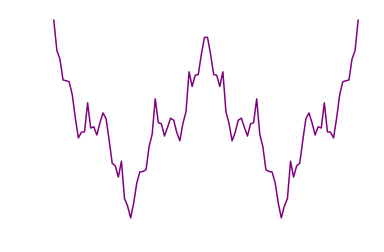

In [3]:
def weierstrass(a, b, x, nmax=100):
    return(
        sum([b**n*cos(a**n*pi*x) for n in range(nmax)])
    )
x = linspace(-2,2, 100)
y = weierstrass(3, 0.5, x)
plt.plot(x, y, color="purple")
plt.axis("off")
plt.show()

На самом деле, если вы заглянете достаточно далеко в бинарное представления числа Пи, константы Эйлера, золотого сечения и т.д., вы рано или поздно обнаружите это число, записанное подряд.  

Это число существовало прежде, чем вы родились и будет существовать, когда вы умрете. Существовало задолго до основания Российской Империи, задолго до постройки Великой Китайской Стены и появления первой самореплицирующейся органической молекулы. Оно существует вне пространства и времени и существовало с самого зарождения вселенной. 

Возможно самая крутая вещь, которая известна об этом числе, - это возможность сделать из него все, что угодно, используя правильную вычислительную систему. Можно составить набор последовательных универсальных аппроксиматоров, который, используя это число как вход, выдаст формулу универсального лекарства от рака. Или общий искусственный интеллект. Или теорию всего.

Или же (вот здесь нам понадобится вышеупомянутая нейросетка):

In [4]:
#Тренируем сетку
h.train()
#меняем форму нашего числа для подачи в сетку
random_number = array([int(a) for a in h.number]).reshape((19,1,41))
#получаем предсказания сетки
predictions = argmax(h.predict(random_number).data.numpy().reshape((19,41)), 1)
#перекодируем предсказания из номеров символов в символы и выводим сообщение
print("".join([h.alph[a] for a in predictions]))

100%|██████████| 100000/100000 [06:18<00:00, 264.22it/s]

покушай и спатки:-)


### Источники:
1. http://abstrusegoose.com/261
2. Теренс Тао, "Структура и случайность".